# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

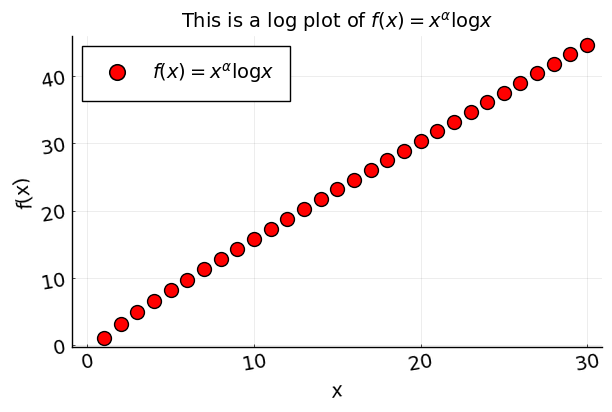

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [6]:
# The function I created in Starter.jl is call new_function, which takes two arguments α and n.
fig = new_function(2, 30) # α=2, n = 30
savefig(fig, "task1.pdf")

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

In [12]:
using Fibonacci
using BenchmarkTools

# The three functions defined are called fibo_recursion, fibo_iteration and fibo_dictmemo. These functions take 3
# arguments, n, F₀ and F₁.

n_vals = 1:48
times_recursion = zeros(length(n_vals))
println("Test recursion.")
for n in n_vals
    bm = @benchmark $fibo_recursion(n)
    times_recursion[n] = median(bm.times)
    println(n, " ", times_recursion[n])
end

Test recursion.
1 335.8974358974359
2 321.84453781512605
3 330.6034482758621
4 329.4871794871795
5 322.3218884120172
6 326.890756302521
7 328.4439655172414
8 325.85775862068965
9 328.57142857142856
10 331.3261802575107
11 327.54237288135596
12 325.6302521008403
13 331.7639484978541
14 328.63247863247864
15 328.78151260504205
16 324.5762711864407
17 331.0301724137931
18 325.3261802575107
19 324.3697478991597
20 324.14224137931035
21 325.764192139738
22 324.46351931330474
23 324.5762711864407
24 324.46781115879827
25 324.5805084745763
26 323.3050847457627
27 330.2987012987013
28 330.3030303030303
29 324.24242424242425
30 322.45762711864404
31 325.0
32 329.18454935622316
33 329.05982905982904
34 322.4618644067797
35 330.47210300429185
36 324.1525423728813
37 330.7359307359307
38 324.35897435897436
39 322.5108225108225
40 323.3093220338983
41 325.8663793103448
42 322.94372294372295
43 323.6051502145923
44 324.1525423728813
45 324.6753246753247
46 322.8448275862069
47 325.87719298245617
48 

In [13]:
times_iteration = zeros(length(n_vals))
println("Test iteration.")
for n in n_vals
    bm = @benchmark $fibo_iteration(n)
    times_iteration[n] = median(bm.times)
    println(n, " ", times_iteration[n])
end

Test iteration.
1 67.27456940222898
2 67.5152749490835
3 67.55102040816327
4 67.10794297352342
5 67.75178026449645
6 68.76805696846388
7 67.75279755849441
8 68.36317395727364
9 69.449083503055
10 67.34693877551021
11 70.19328585961343
12 68.1586978636826
13 69.85845213849286
14 68.77551020408163
15 69.18367346938776
16 67.55102040816327
17 67.10794297352342
18 67.61710794297352
19 67.85350966429299
20 67.10794297352342
21 66.97154471544715
22 68.20040899795501
23 67.61710794297352
24 69.6542769857434
25 70.061099796334
26 68.12627291242363
27 66.93979591836735
28 68.16224489795918
29 69.89795918367346
30 69.08265306122449
31 69.48118006103763
32 69.75560081466395
33 67.61710794297352
34 67.34587995930823
35 69.52862985685071
36 68.36734693877551
37 68.66632756866734
38 68.32993890020367
39 67.2441505595117
40 69.79591836734694
41 67.00610997963341
42 65.58044806517312
43 66.70061099796334
44 66.46177370030581
45 67.10558375634518
46 64.59816887080366
47 63.23828920570265
48 63.98880976

In [17]:
times_memodict = zeros(length(n_vals))
println("Test memorization.")
for n in n_vals
    bm = @benchmark $fibo_memodict(n)
    times_memodict[n] = median(bm.times)
    println(n, " ", times_memodict[n])
end

Test memorization.


LoadError: MethodError: objects of type Array{Float64,1} are not callable
Use square brackets [] for indexing an Array.

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

In [10]:
push!(LOAD_PATH, pwd())

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "C:\\Users\\76493\\Desktop\\Codes\\ma934-worksheet-1-YIMINGMA"
 "C:\\Users\\76493\\Desktop\\Codes\\ma934-worksheet-1-YIMINGMA"

┌ Info: Precompiling Starter [top-level]
└ @ Base loading.jl:1278


args[group2][parameter3] = 10.0

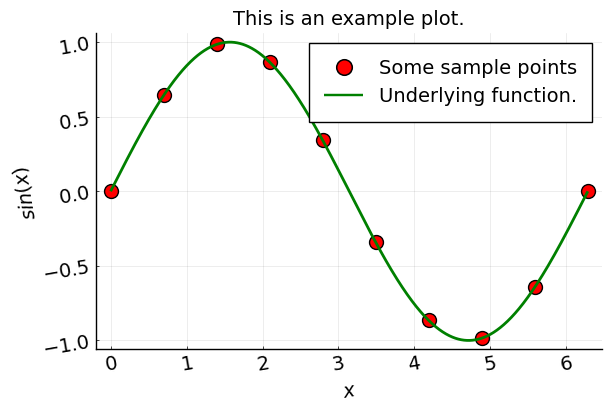

  Type = Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [2]:
include("main.jl")

In [3]:
using Pkg

In [4]:
Pkg.add("YAML")

   Updating registry at `C:\Users\76493\.julia\registries\General`
   Updating registry at `C:\Users\76493\.julia\registries\JuliaComputingRegistry`
  Resolving package versions...
No Changes to `C:\Users\76493\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\76493\.julia\environments\v1.5\Manifest.toml`


search: new_function



This function provides scatter log plot of f(x) = x^alpha log(x).
